In [197]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

UVJinfo = pd.read_csv('UBVJ_MASTER_SpARCS_0035.csv')
KJzRinfo = pd.read_csv('SpARCS_0035_totalall_HAWKIKs_photom.csv')

ID = KJzRinfo.id
k_flux = KJzRinfo.HAWKIKs_tot
R_flux = KJzRinfo.VIMOSR
z_flux = KJzRinfo.DECamz
J_flux = KJzRinfo.HAWKIJ
k_star = KJzRinfo.K_star
mask = KJzRinfo.totmask
IDUVJ = UVJinfo.PHOTID
CLUSTERZ = UVJinfo.CLUSTERZ
indivz = UVJinfo.INDIVZ
UMINV = UVJinfo.U_V
VMINJ = UVJinfo.V_J


#JMINK = np.where((-2.5 * log(k_flux/J_flux), 10) & J_flux > 0)
#if J_flux > 0:
  #  print (J_flux)


#if mask.all(mask==0) and k_star.all(k_star<0.97):
J_K = 2.5*np.log10(k_flux/J_flux)
z_K = 2.5*np.log10(k_flux/z_flux)
R_K = 2.5*np.log10(k_flux/R_flux)
K = -2.5*np.log10(k_flux) + 25
#JMINK = J_K[~np.isnan(J_K)]


c = 0
c2 = 0
c3 = 0
c4 = 0

for i in range(len(k_star)):
    if k_star[i] < 0.97 and mask[i] == 0 and ~np.isnan(J_K[i]) == True:
        c = c + 1
    if k_star[i] < 0.97 and mask[i] == 0 and ~np.isnan(z_K[i]) == True:
        c2 = c2 + 1
    if k_star[i] < 0.97 and mask[i] == 0 and ~np.isnan(R_K[i]) == True:
        c3 = c3 + 1
    if k_star[i] < 0.97 and mask[i] == 0: #and ~np.isnan(R_K[i]) == True:
        c4 = c4 + 1
    
JMINK = np.zeros((c,1), dtype=float)
zMINK = np.zeros((c2,1), dtype=float)
RMINK = np.zeros((c3,1), dtype=float)
VJ = np.zeros((c4,1), dtype=float)
UV = np.zeros((c4,1), dtype=float)
MK = np.zeros((c,1), dtype=float)
MK2 = np.zeros((c2,1), dtype=float)
MK3 = np.zeros((c3,1), dtype=float)
KMAG = np.zeros((c4,1), dtype=float)
b = 0
b2 = 0
b3 = 0
b4 = 0

for i in range(len(k_star)):
    if k_star[i] < 0.97 and mask[i] == 0 and ~np.isnan(J_K[i]) == True:
        JMINK[b] = J_K[i]
        MK[b] = K[i]
        b = b + 1
    if k_star[i] < 0.97 and mask[i] == 0 and ~np.isnan(z_K[i]) == True:
        zMINK[b2] = z_K[i]
        MK2[b2] = K[i]
        b2 = b2 + 1
    if k_star[i] < 0.97 and mask[i] == 0 and ~np.isnan(R_K[i]) == True:
        RMINK[b3] = R_K[i]
        MK3[b3] = K[i]
        b3 = b3 + 1
    if k_star[i] < 0.97 and mask[i] == 0:# and ~np.isnan(R_K[i]) == True:
        VJ[b4] = VMINJ[i]
        UV[b4] = UMINV[i]
        KMAG[b4] = K[i]
        b4 = b4 + 1
        

/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in log10


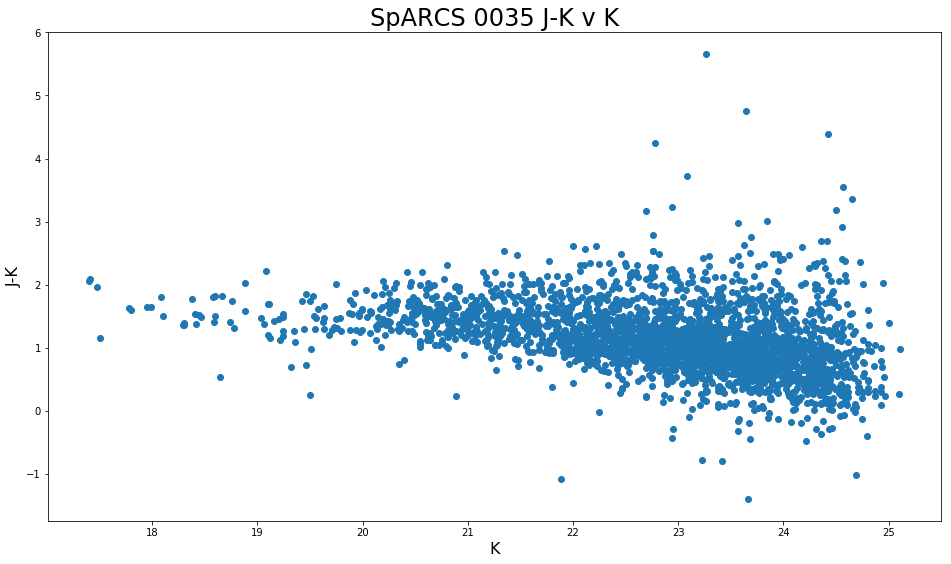

In [173]:
J_K = J_K[~np.isnan(J_K)]
z_K = z_K[~np.isnan(z_K)]
R_K = R_K[~np.isnan(R_K)]
K = K[~np.isnan(K)]


#goodobject = np.where((k_star < 0.97) and (mask == 0))
title = 'SpARCS 0035'
plt.figure(figsize=(16,9))
plt.plot(MK, JMINK, 'o')
plt.title(title + ' J-K v K', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('J-K', fontsize = 16)
plt.show()

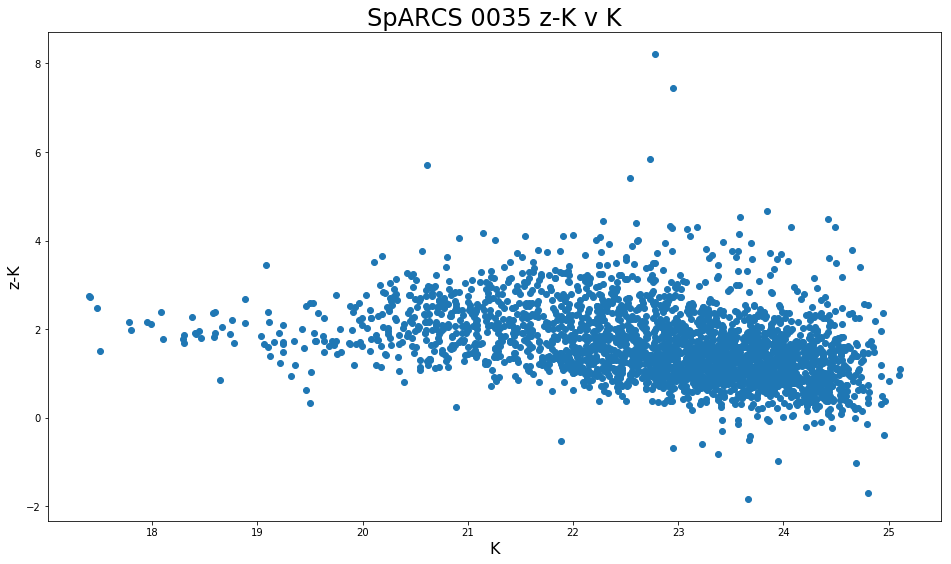

In [189]:
plt.figure(figsize=(16,9))
plt.plot(MK2, zMINK, 'o')
plt.title(title + ' z-K v K', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('z-K', fontsize = 16)
plt.show()

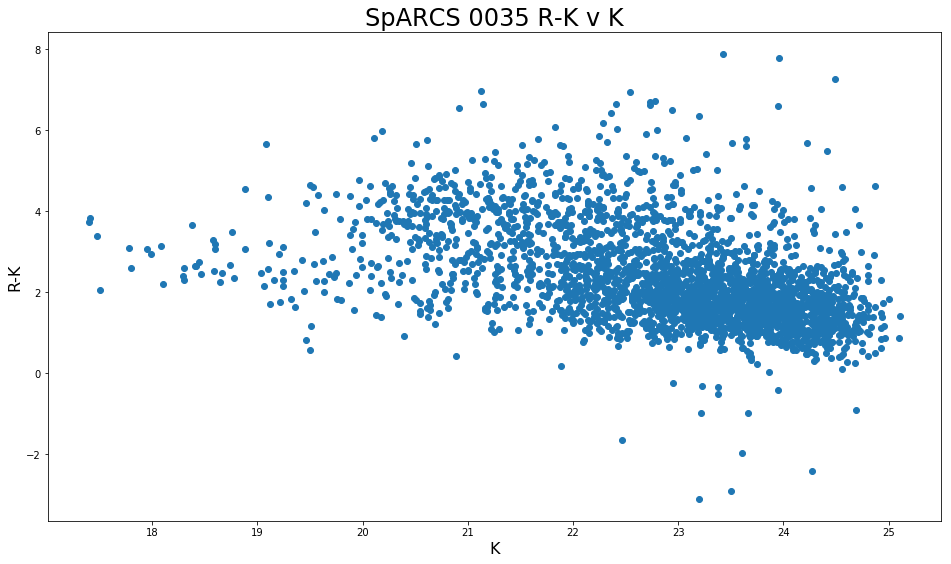

In [188]:
plt.figure(figsize=(16,9))
plt.plot(MK3, RMINK, 'o')
plt.title(title + ' R-K v K', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('R-K', fontsize = 16)
plt.show()

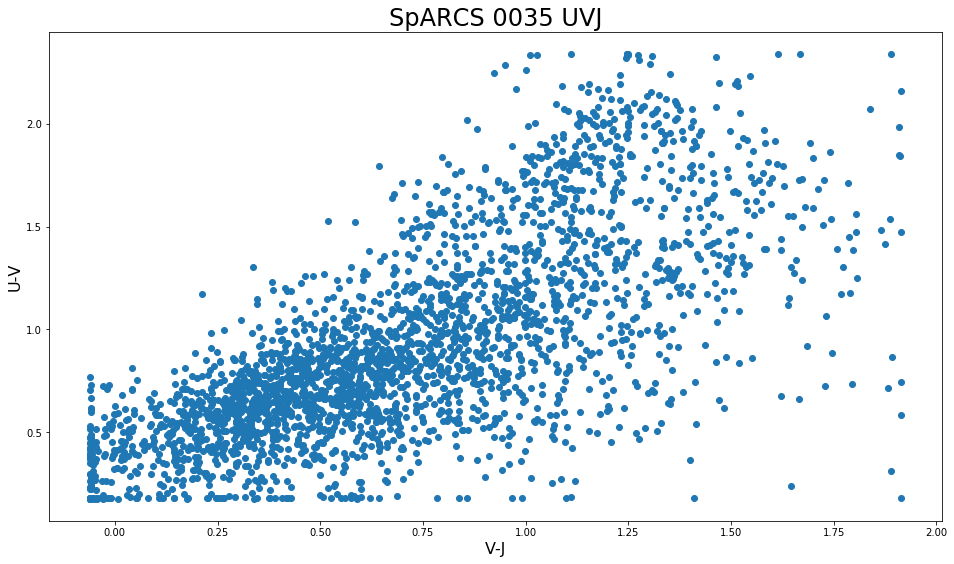

In [194]:
plt.figure(figsize=(16,9))
plt.plot(VJ, UV, 'o')
plt.title(title + ' UVJ', fontsize = 24)
plt.xlabel('V-J', fontsize = 16)
plt.ylabel('U-V', fontsize = 16)
plt.show()

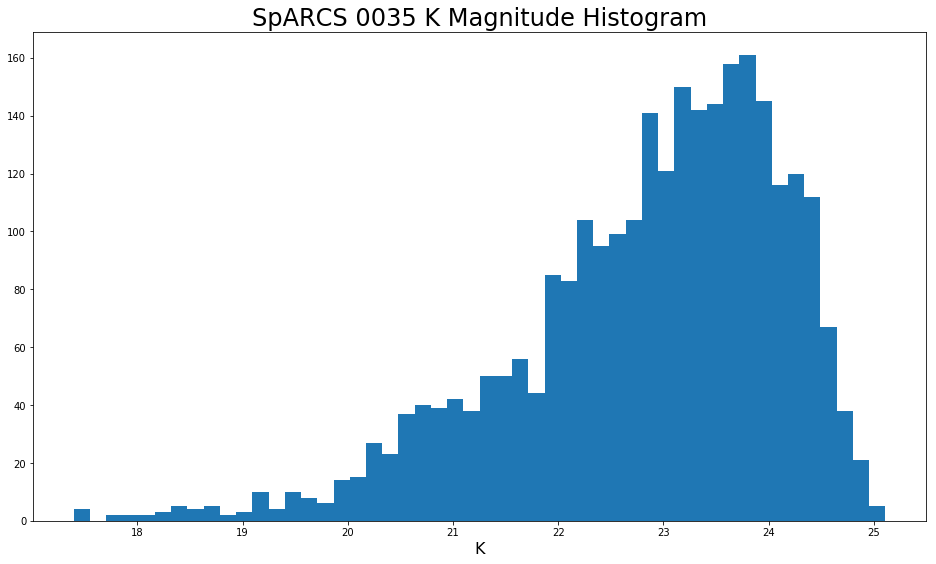

In [198]:
plt.figure(figsize=(16,9))
plt.hist(KMAG, 50)
plt.title(title + ' K Magnitude Histogram', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.show()